Importing necessary libraries

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing , tree
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import get_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_validate, GroupKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import matplotlib as plt
import pandas as pd
import numpy as np

importing the dataset

In [8]:
sales_df = pd.read_csv("/content/supermarket-sales-data.csv")

dividing it into two parts

In [9]:
X_gen = sales_df.iloc[: , [1,2,4,5,6,7,8,9,10] ].values
y_gen = sales_df.iloc[:,3].values

In [10]:
X_gen

array([['A', 'Member', 'Health and beauty', ..., 548.9715, 'UPI', 9.1],
       ['C', 'Normal', 'Electronic accessories', ..., 80.22, 'Cash', 9.6],
       ['A', 'Normal', 'Home and lifestyle', ..., 340.5255,
        'Credit card', 7.4],
       ...,
       ['A', 'Member', 'Food and beverages', ..., 33.432, 'Cash', 7.7],
       ['A', 'Normal', 'Home and lifestyle', ..., 69.111, 'Cash', 4.1],
       ['A', 'Member', 'Fashion accessories', ..., 649.299, 'Cash', 6.6]],
      dtype=object)

since it have categorical data we need to use ColumnTransfer

In [11]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,7])], remainder='passthrough')
X_gen_new= np.array(ct.fit_transform(X_gen))

In [12]:
X_gen_new

array([[1.0, 0.0, 0.0, ..., 26.1415, 548.9715, 9.1],
       [0.0, 0.0, 1.0, ..., 3.82, 80.22, 9.6],
       [1.0, 0.0, 0.0, ..., 16.2155, 340.5255, 7.4],
       ...,
       [1.0, 0.0, 0.0, ..., 1.592, 33.432, 7.7],
       [1.0, 0.0, 0.0, ..., 3.291, 69.111, 4.1],
       [1.0, 0.0, 0.0, ..., 30.919, 649.299, 6.6]], dtype=object)

Splitting into training and testing data

In [13]:
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_gen_new, y_gen, test_size=0.25, random_state=42)

1.a) Decision Tree Classifier

In [69]:
clf_dtc = tree.DecisionTreeClassifier(max_depth = 3, min_samples_split = 10, min_samples_leaf =3)
clf_dtc = clf_dtc.fit(X_gen_train, y_gen_train)

In [70]:
y_gen_train_fit = clf_dtc.predict(X_gen_train)
print(classification_report(y_gen_train, y_gen_train_fit))

              precision    recall  f1-score   support

      Female       0.57      0.90      0.69       387
        Male       0.71      0.27      0.39       363

    accuracy                           0.59       750
   macro avg       0.64      0.58      0.54       750
weighted avg       0.64      0.59      0.55       750



In [71]:
y_gen_pred = clf_dtc.predict(X_gen_test)

In [72]:
accuracy_score(y_gen_test, y_gen_pred)

0.464

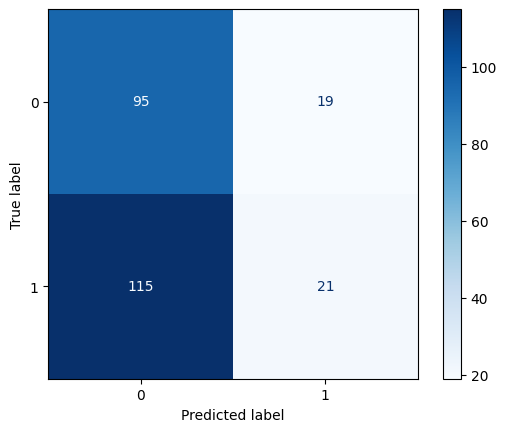

In [73]:
cm = confusion_matrix(y_gen_test , y_gen_pred)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap ="Blues")

In [75]:
print(classification_report(y_gen_test, y_gen_pred))

              precision    recall  f1-score   support

      Female       0.45      0.83      0.59       114
        Male       0.53      0.15      0.24       136

    accuracy                           0.46       250
   macro avg       0.49      0.49      0.41       250
weighted avg       0.49      0.46      0.40       250



we acchieved 47% of accuracy. we can use grid search CV to tune this model

In [ ]:
param = {
    "max_depth": range(5,7),
    "min_samples_split": range(3,7),
    "max_leaf_nodes": range(2,10,2),
    "min_samples_leaf" : range(2,6)
}

dtc1 = tree.DecisionTreeClassifier( random_state=0)


grid_search = GridSearchCV(
    estimator=dtc1,
    param_grid=param,
    cv=250,
    scoring="accuracy"
)

grid_search.fit(X_gen_new, y_gen)
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=3, random_state=0)


In [67]:
dtc3 =tree.DecisionTreeClassifier(max_depth=5, max_leaf_nodes=6, min_samples_leaf=2,
                       min_samples_split=3, random_state=24)
dtc3 = dtc3.fit(X_gen_train, y_gen_train)
y_gen_dtc3_train_fit = dtc3.predict(X_gen_train)
print(classification_report(y_gen_train, y_gen_dtc3_train_fit))

              precision    recall  f1-score   support

      Female       0.56      0.90      0.69       387
        Male       0.70      0.26      0.37       363

    accuracy                           0.59       750
   macro avg       0.63      0.58      0.53       750
weighted avg       0.63      0.59      0.54       750



In [68]:
y_gen_dtc3_pred = dtc3.predict(X_gen_test)
print(classification_report(y_gen_test, y_gen_dtc3_pred))

              precision    recall  f1-score   support

      Female       0.45      0.83      0.58       114
        Male       0.51      0.15      0.23       136

    accuracy                           0.46       250
   macro avg       0.48      0.49      0.41       250
weighted avg       0.48      0.46      0.39       250



1.b) RandomForestClassifier

In [32]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3,min_samples_split=6,min_samples_leaf =4,n_jobs=3, max_leaf_nodes = 10, random_state=0)
rf.fit(X_gen_train, y_gen_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=10, min_samples_leaf=4,
                       min_samples_split=6, n_estimators=10, n_jobs=3,
                       random_state=0)

In [33]:
y_gen_rf_train_fit = rf.predict(X_gen_train)
print(classification_report(y_gen_train, y_gen_rf_train_fit))

              precision    recall  f1-score   support

      Female       0.62      0.80      0.70       387
        Male       0.69      0.49      0.57       363

    accuracy                           0.65       750
   macro avg       0.66      0.64      0.64       750
weighted avg       0.66      0.65      0.64       750



In [34]:
y_gen_rf_pred = rf.predict(X_gen_test)

In [35]:
accuracy_score(y_gen_test , y_gen_rf_pred)

0.448

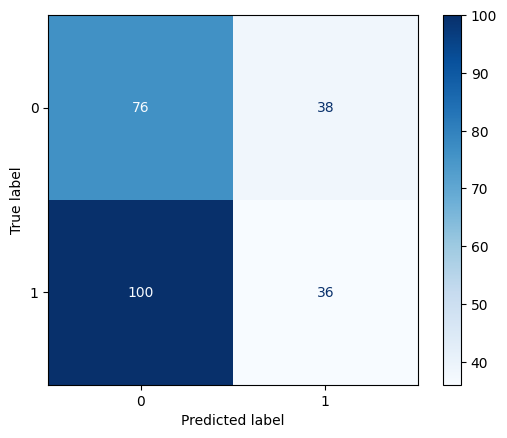

In [36]:
cm = confusion_matrix(y_gen_test , y_gen_rf_pred)
display = ConfusionMatrixDisplay(cm)
display.plot(cmap ="Blues")

In [37]:
print(classification_report(y_gen_test, y_gen_rf_pred))

              precision    recall  f1-score   support

      Female       0.43      0.67      0.52       114
        Male       0.49      0.26      0.34       136

    accuracy                           0.45       250
   macro avg       0.46      0.47      0.43       250
weighted avg       0.46      0.45      0.43       250



In [ ]:
param = {
    "max_depth": range(5,7),
    "min_samples_split": range(3,7),
    "max_leaf_nodes": range(2,10,2),
    "min_samples_leaf" : range(2,6)
}

rf1 = RandomForestClassifier(n_estimators=50,n_jobs=3, random_state=0)


grid_search = GridSearchCV(
    estimator=rf1,
    param_grid=param,
    cv=20,
    scoring="accuracy"
)

grid_search.fit(X_gen_new, y_gen)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=5, max_leaf_nodes=8, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, n_jobs=3,
                       random_state=0)


In [38]:
rf2 = RandomForestClassifier(max_depth=5, max_leaf_nodes=8, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=50, n_jobs=3,
                       random_state=0)
rf2.fit(X_gen_train, y_gen_train)
y_gen_rf2_train_fit = rf2.predict(X_gen_train)
print(classification_report(y_gen_train, y_gen_rf2_train_fit))

              precision    recall  f1-score   support

      Female       0.66      0.81      0.73       387
        Male       0.73      0.55      0.63       363

    accuracy                           0.69       750
   macro avg       0.69      0.68      0.68       750
weighted avg       0.69      0.69      0.68       750



In [39]:
y_gen_rf2_pred = rf2.predict(X_gen_test)

In [40]:
print(classification_report(y_gen_test, y_gen_rf2_pred))

              precision    recall  f1-score   support

      Female       0.45      0.65      0.53       114
        Male       0.53      0.34      0.41       136

    accuracy                           0.48       250
   macro avg       0.49      0.49      0.47       250
weighted avg       0.50      0.48      0.47       250



**2. Model for predicting rating**

In [41]:
X_rat = sales_df.iloc[: , 1:-1]
y_rat = sales_df.iloc[:, -1]

In [42]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,8])], remainder='passthrough')
X_rat_new= np.array(ct.fit_transform(X_rat))

In [51]:
X_rat_train, X_rat_test, y_rat_train, y_rat_test = train_test_split(X_rat_new, y_rat, test_size=0.2, random_state=20)

In [52]:
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(X_rat_train , y_rat_train)

DecisionTreeRegressor(max_depth=5)

In [53]:
y_rat_dtr_pred = dtr.predict(X_rat_test)

In [54]:
from sklearn.metrics import r2_score, mean_squared_error ,mean_absolute_error
from sklearn.linear_model import Ridge
r2_score(y_rat_test, y_rat_dtr_pred)


-0.1962002408967296

In [55]:
mean_squared_error(y_rat_test, y_rat_dtr_pred)

mae = mean_absolute_error(y_rat_test, y_rat_dtr_pred)

mse =mean_squared_error(y_rat_test, y_rat_dtr_pred)

rmse = np.sqrt(mean_squared_error(y_rat_test, y_rat_dtr_pred))

r2 = r2_score(y_rat_test, y_rat_dtr_pred)

print("Metrics for Decision Tree Regression Model:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

Metrics for Decision Tree Regression Model:
Mean Squared Error (MSE): 3.7418217124965905
Mean Absolute Error (MAE): 1.6346740255771175
Root Mean Squared Error (RMSE): 1.9343788957948727
R^2 Score: -0.1962002408967296


In [56]:
lrm = LinearRegression(n_jobs = 3)
lrm.fit(X_rat_train , y_rat_train)

LinearRegression(n_jobs=3)

In [57]:
y_rat_lrm_pred = lrm.predict(X_rat_test)

In [58]:
mse_lrm = mean_squared_error(y_rat_test, y_rat_lrm_pred)

mae_lrm = mean_absolute_error(y_rat_test, y_rat_lrm_pred)

rmse_lrm = np.sqrt(mse_lrm)

r2_lrm = r2_score(y_rat_test, y_rat_lrm_pred)

print("Metrics for Linear Regression Model:")
print("Mean Squared Error (MSE):", mse_lrm)
print("Mean Absolute Error (MAE):", mae_lrm)
print("Root Mean Squared Error (RMSE):", rmse_lrm)
print("R^2 Score:", r2_lrm)

Metrics for Linear Regression Model:
Mean Squared Error (MSE): 3.2598081533194367
Mean Absolute Error (MAE): 1.555497619432542
Root Mean Squared Error (RMSE): 1.8054938807205736
R^2 Score: -0.042108255787557614
